"""
EEG Correlation Analysis Script

This script takes pre-processed EEG data, computes correlation matrices, and visualizes the results.
Computes group-level averages and statistical significance. Subject specific analysis possible.
It integrates MNE for EEG analysis, Brainspace and Nilearn for surface-based processing, and BrainStat for parcellation.  

### Key Steps:
1. **Load EEG Data:** Uses MNE to read and preprocess EEG data.
2. **Compute Correlation Matrices:** Constructs functional correlation matrices from EEG signals.
3. **Statistical Analysis:** Applies correlation metrics and visualizes results with seaborn and matplotlib.
4. **Visualization** – Generates heatmaps for EC, EO, difference matrices, and significance if applicable.

Please check chdir in line 32 (import block line 11)

Authors: Marian Simarro gonzalez@cbs.mpg.de
Last Updated: March 2025
"""

In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd 
from mne.io import read_raw_eeglab

os.chdir("C:/Users/Marianne/Downloads/Lemon/")  # Change to your actual folder where little_helpers.py and config.py files are
sys.path.append(os.getcwd())  # Ensure the current directory is added to the path
import config
from config import subjects, subjects_list, conditions, matrix_type, con_folder, corr_folder, input_folder

# Def functions

In [4]:
def compute_eeg_correlation_matrix(file_path, 
                                   ref_channels=None, 
                                   filter_params=None,
                                   reject_params=None):
    """
    Compute correlation matrix from EEG .set file
    
    Parameters:
    -----------
    file_path : str
        Path to the EEG .set file
    ref_channels : list, optional
        List of reference channels
    filter_params : dict, optional
        Parameters for filtering (e.g., {'l_freq': 1, 'h_freq': 50})
    reject_params : dict, optional
        Parameters for artifact rejection
    
    Returns:
    --------
    correlation_matrix : numpy.ndarray
        Correlation matrix of EEG channels
    channel_names : list
        List of channel names
    """
    # Read the EEG file with preloading
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # Optional: Apply referencing
    if ref_channels:
        # Check if the specified reference channels exist
        available_channels = raw.ch_names
        valid_ref_channels = [ch for ch in ref_channels if ch in available_channels]
        
        if valid_ref_channels:
            raw.set_eeg_reference(valid_ref_channels)
        else:
            print(f"Warning: Specified reference channels {ref_channels} not found. "
                  f"Available channels are: {available_channels}")
            # Optional: Use average reference if no specific channels found
            raw.set_eeg_reference('average')
    
    # Optional: Apply filtering
    if filter_params:
        raw.filter(**filter_params)
    
    # Optional: Reject artifacts
    if reject_params:
        # Convert raw data to epochs for artifact rejection
        events = mne.make_fixed_length_events(raw, duration=1.0)
        epochs = mne.Epochs(raw, events, reject=reject_params, preload=True)
        data = epochs.get_data().mean(axis=0)  # Average across epochs
    else:
        # If no rejection, use raw data
        data, _ = raw[:]
    
    # Compute correlation matrix
    correlation_matrix = np.corrcoef(data)
    
    return correlation_matrix, raw.ch_names

def plot_correlation_matrix(correlation_matrix, 
                             channel_names, 
                             title='EEG Correlation Matrix',
                             cmap='coolwarm'):
    """
    Plot correlation matrix with channel names
    
    Parameters:
    -----------
    correlation_matrix : numpy.ndarray
        Correlation matrix to plot
    channel_names : list
        List of channel names
    title : str, optional
        Title of the plot
    cmap : str, optional
        Colormap for the plot
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=False, 
                cmap=cmap, 
                center=0,
                square=True, 
                xticklabels=channel_names, 
                yticklabels=channel_names)
    plt.title(title)
    plt.tight_layout()
    plt.show()
  

# Correlation matrices

C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010005_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032304_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010005_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


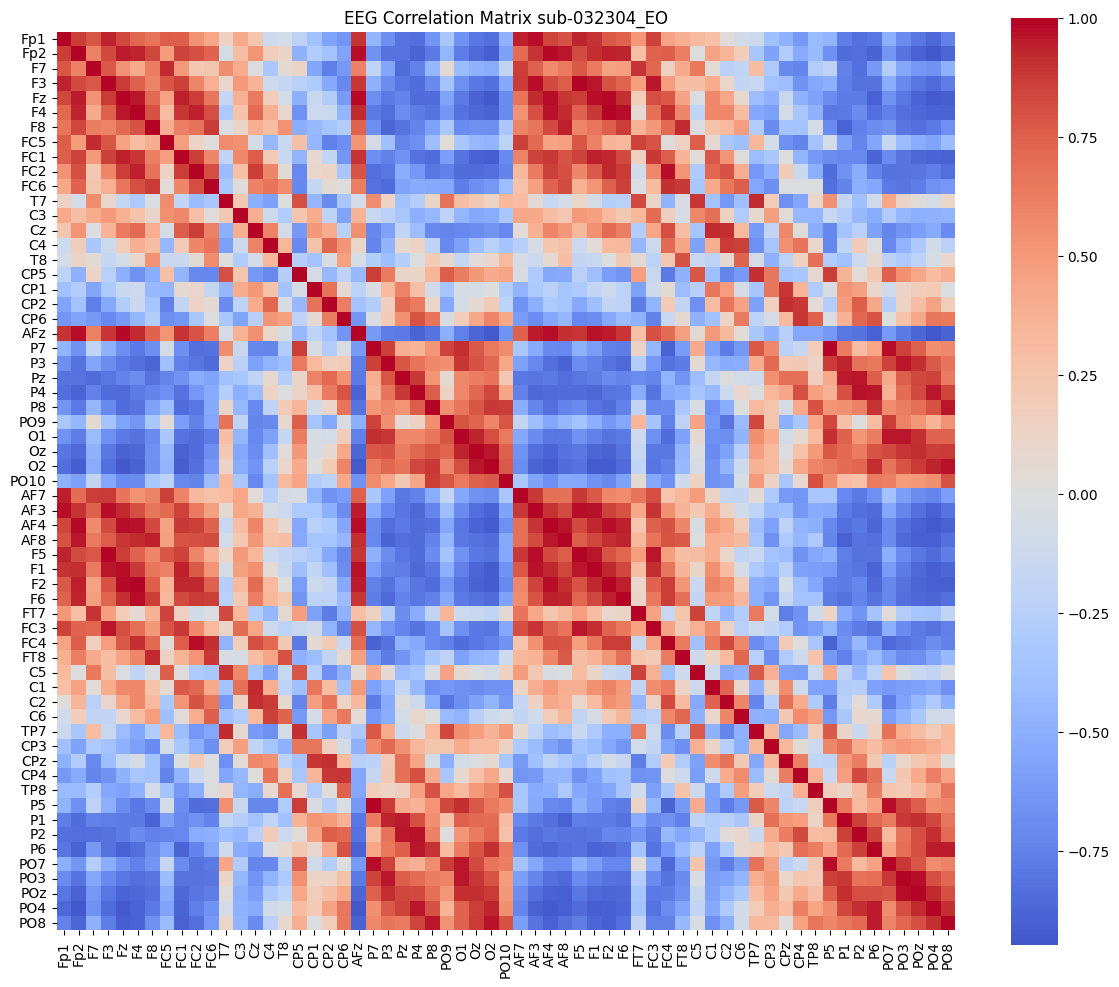

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010005_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032304_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010005_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


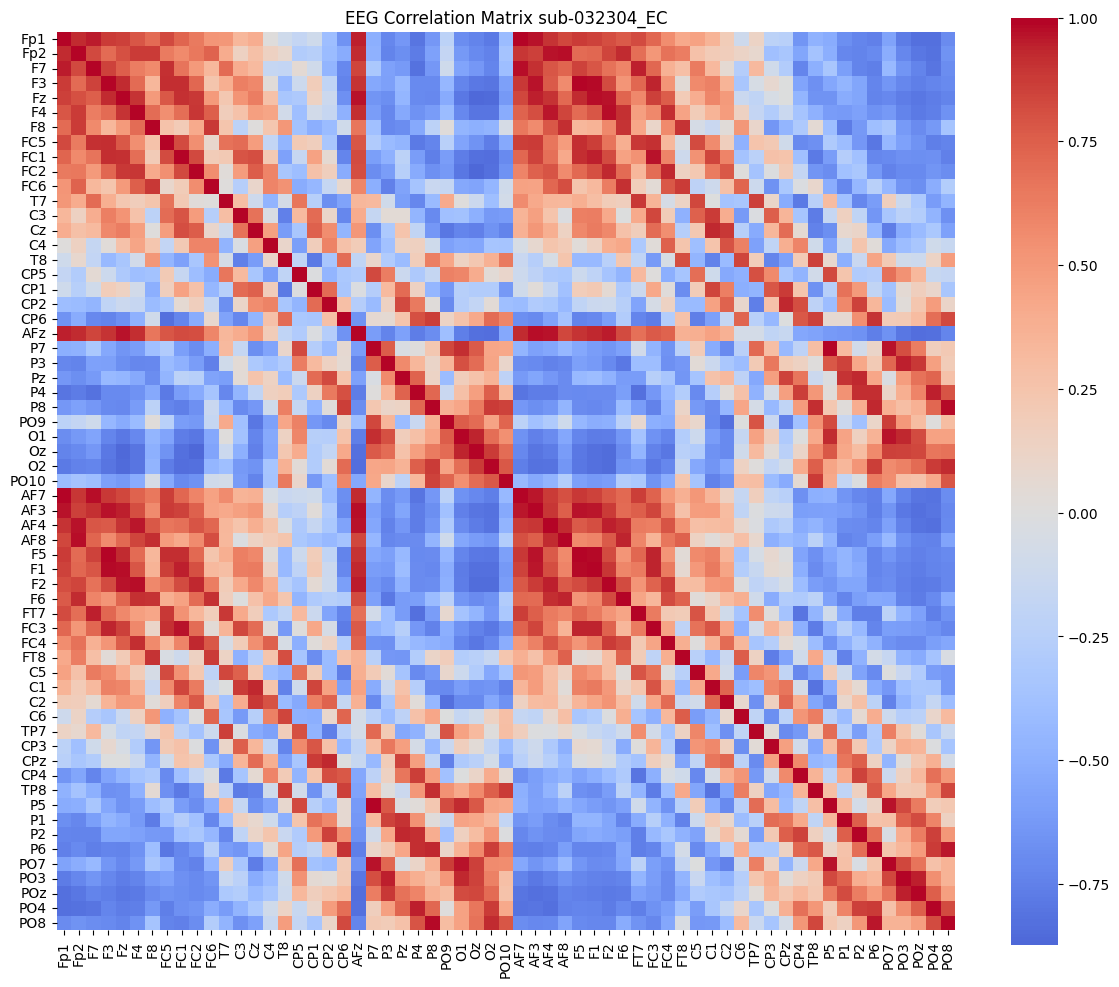

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010006_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032305_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010006_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


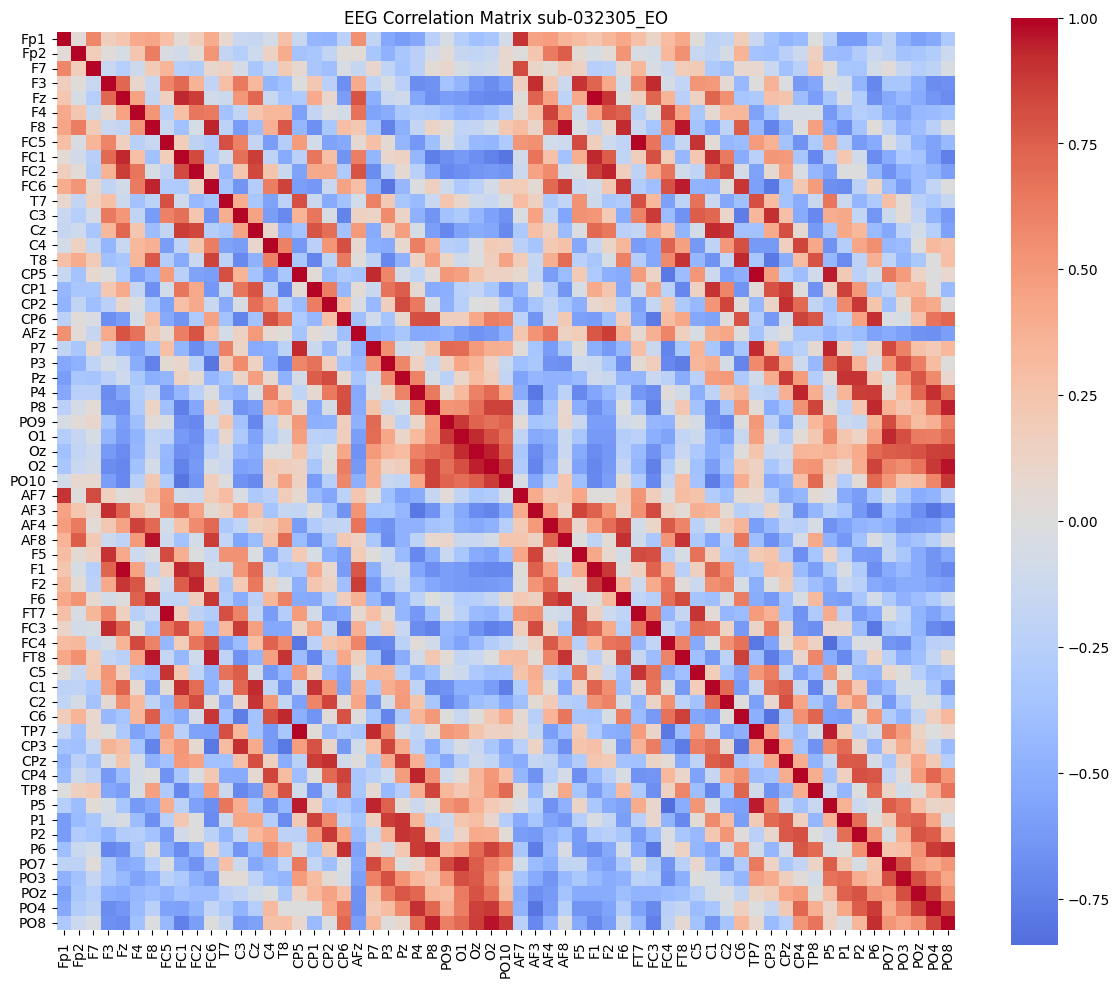

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010006_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032305_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010006_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


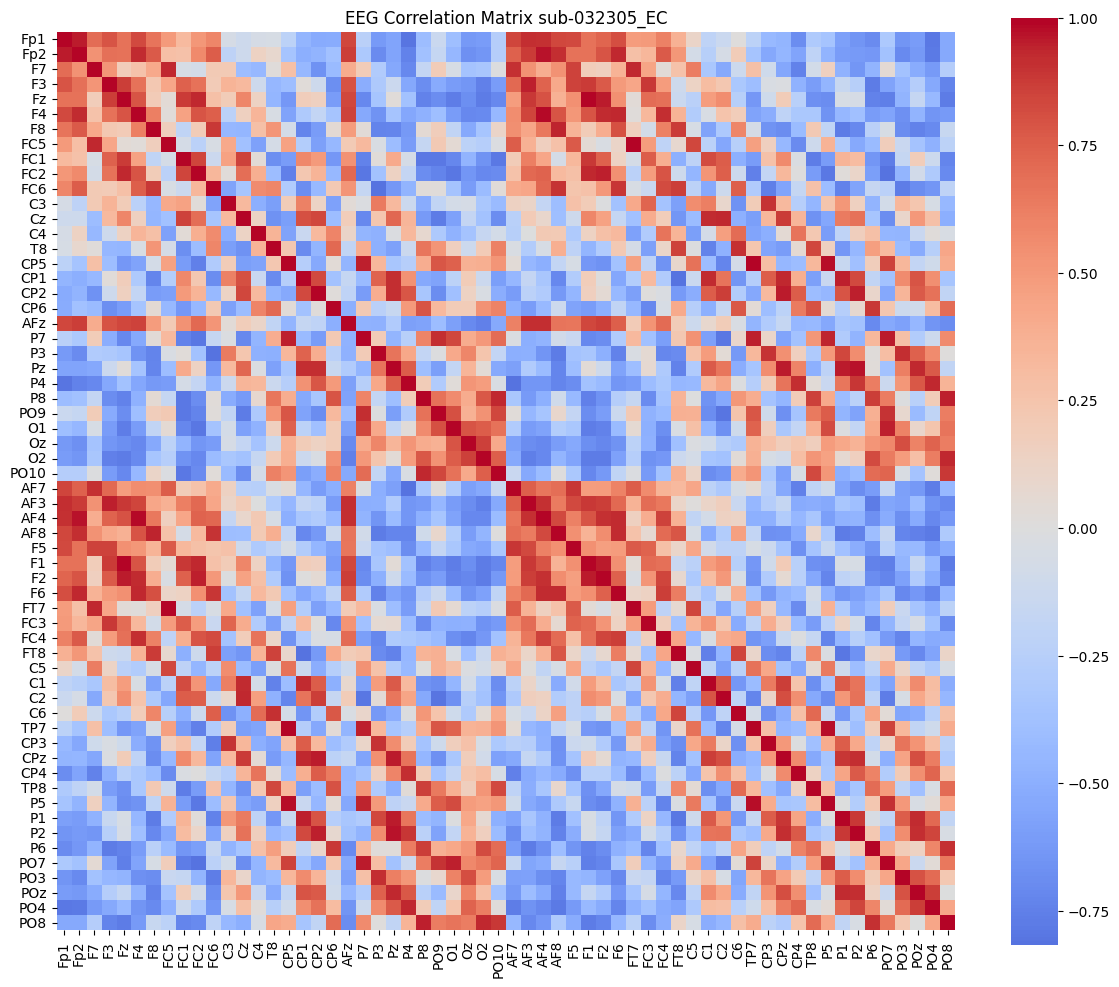

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010007_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032306_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010007_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

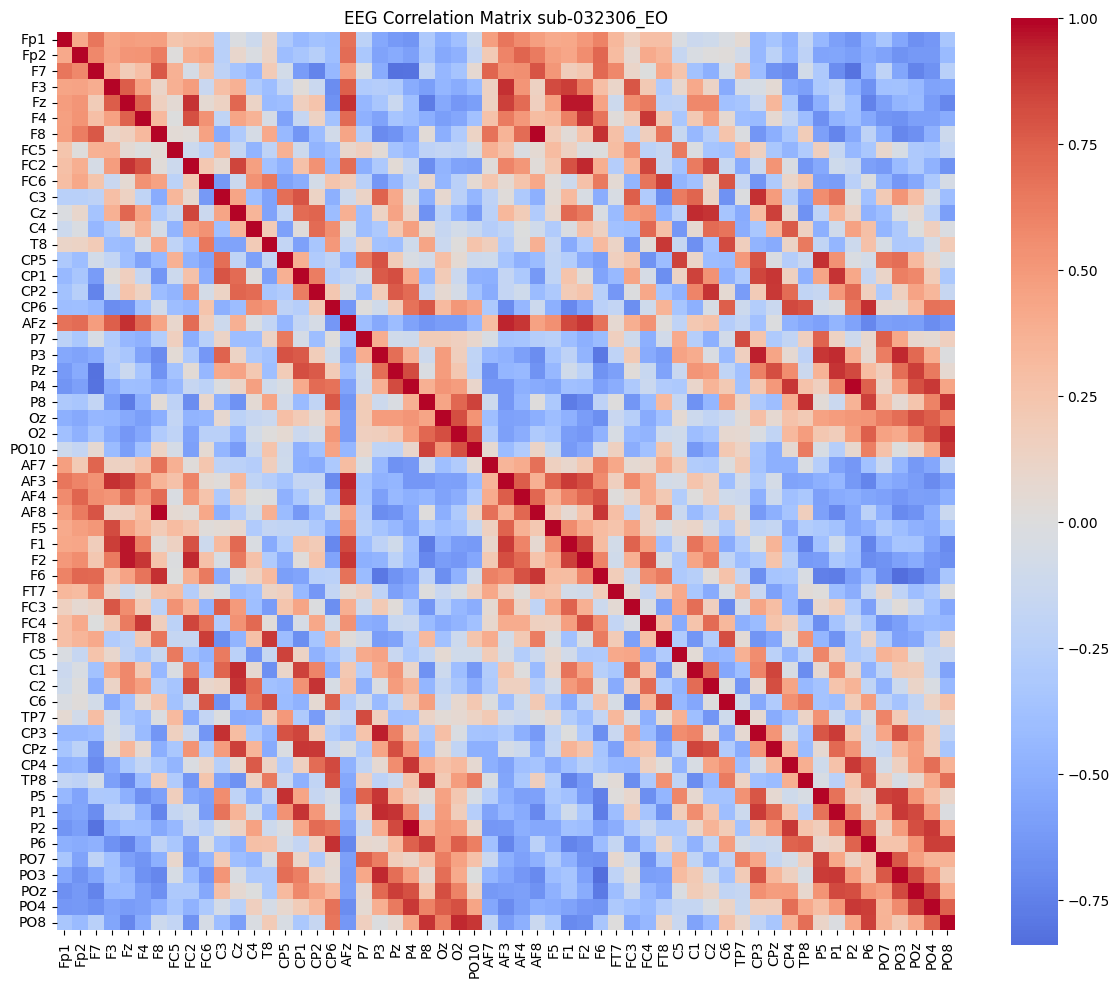

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010007_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032306_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010007_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


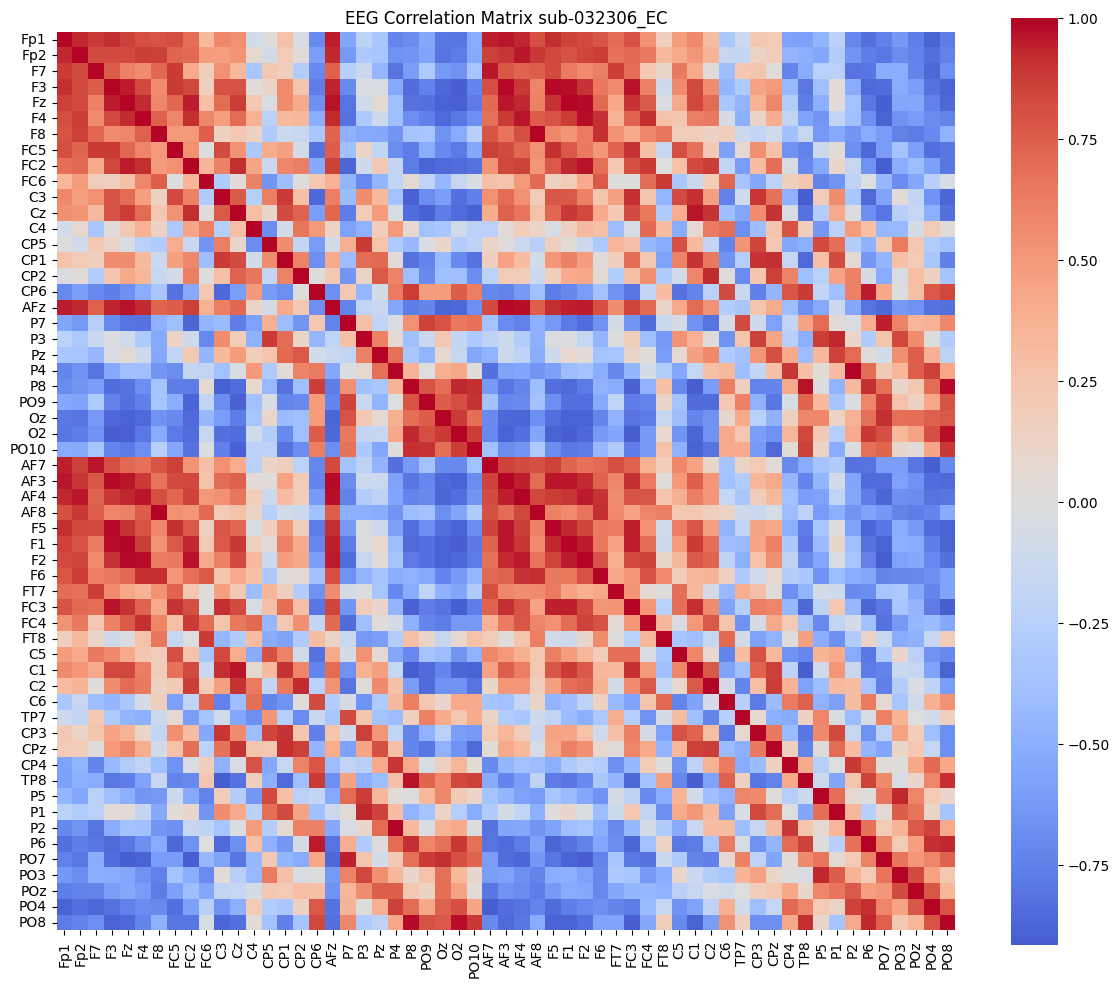

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010010_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032307_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010010_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


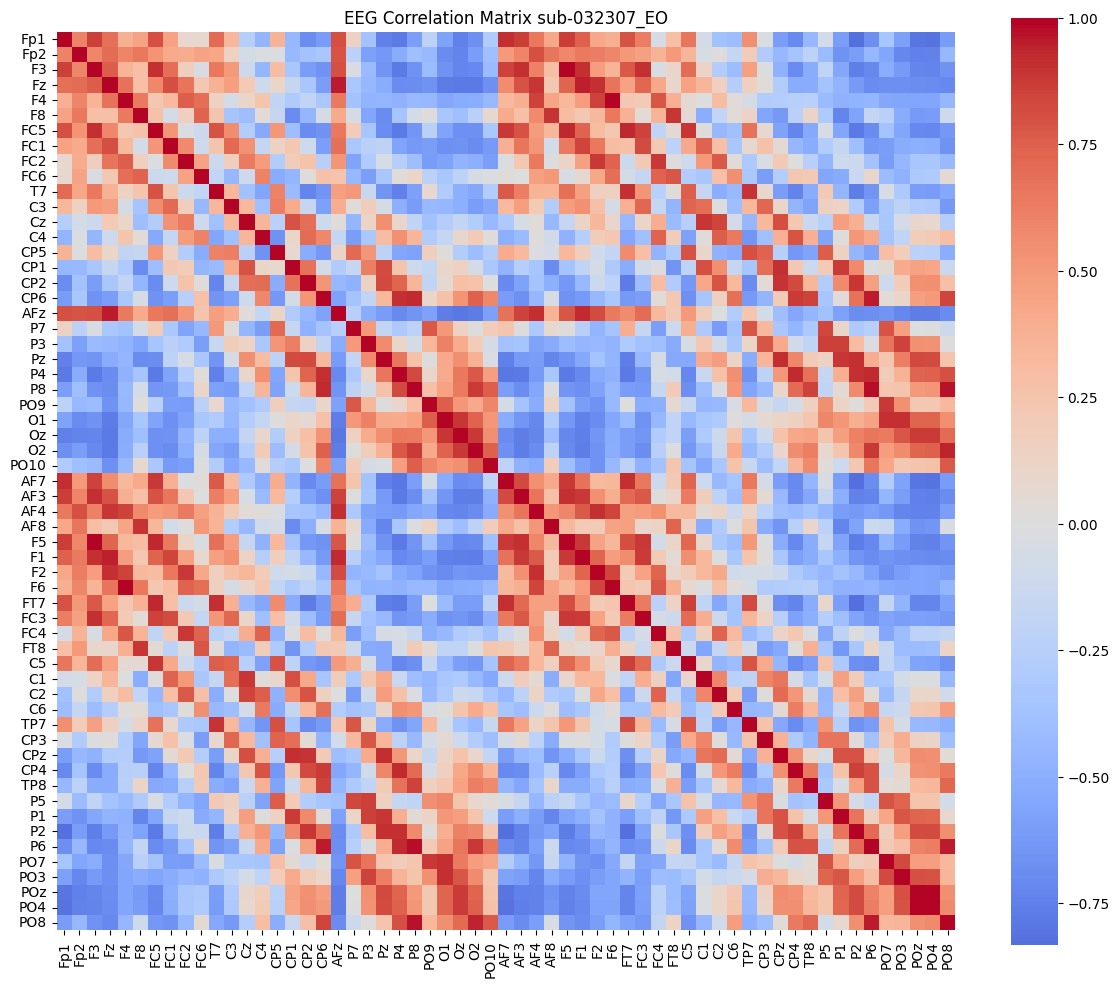

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010010_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032307_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010010_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

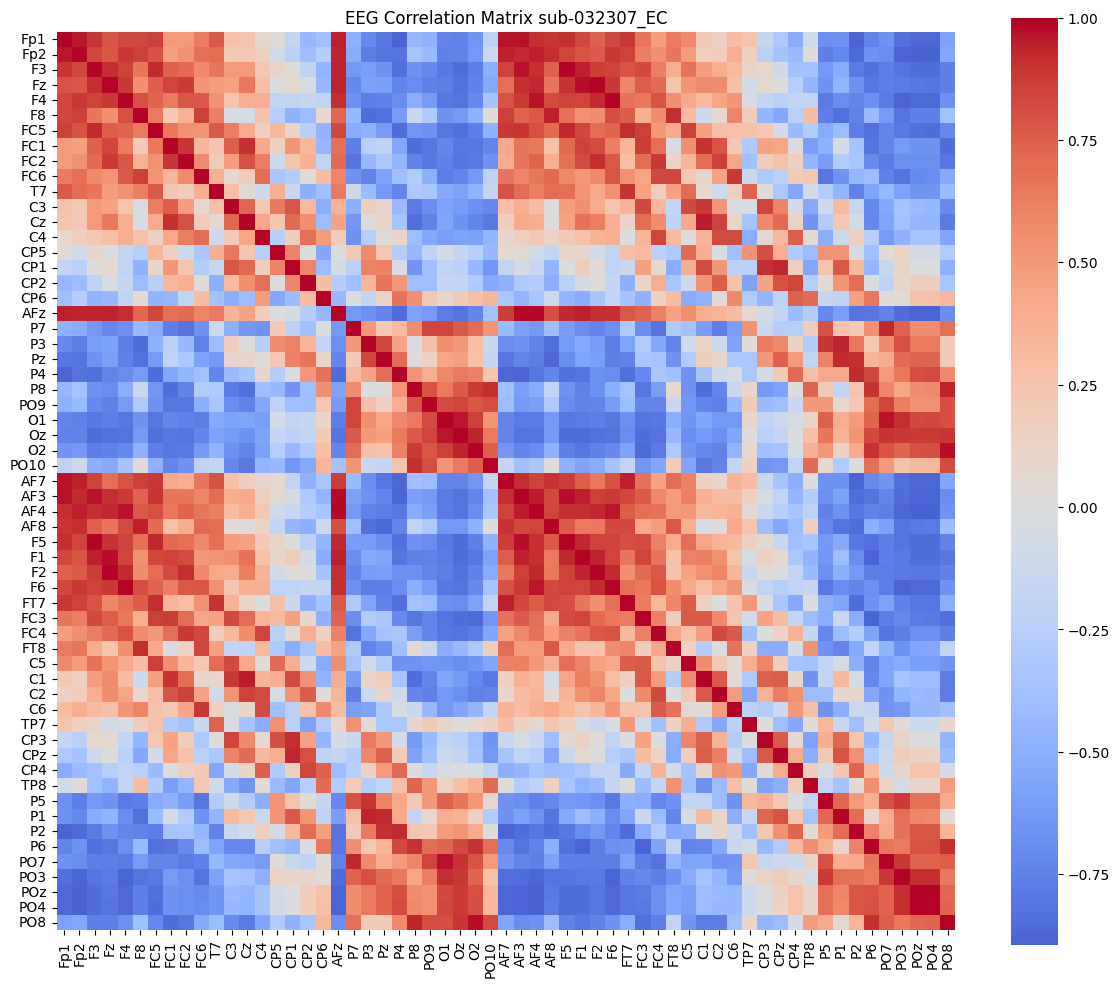

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010012_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032308_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010012_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


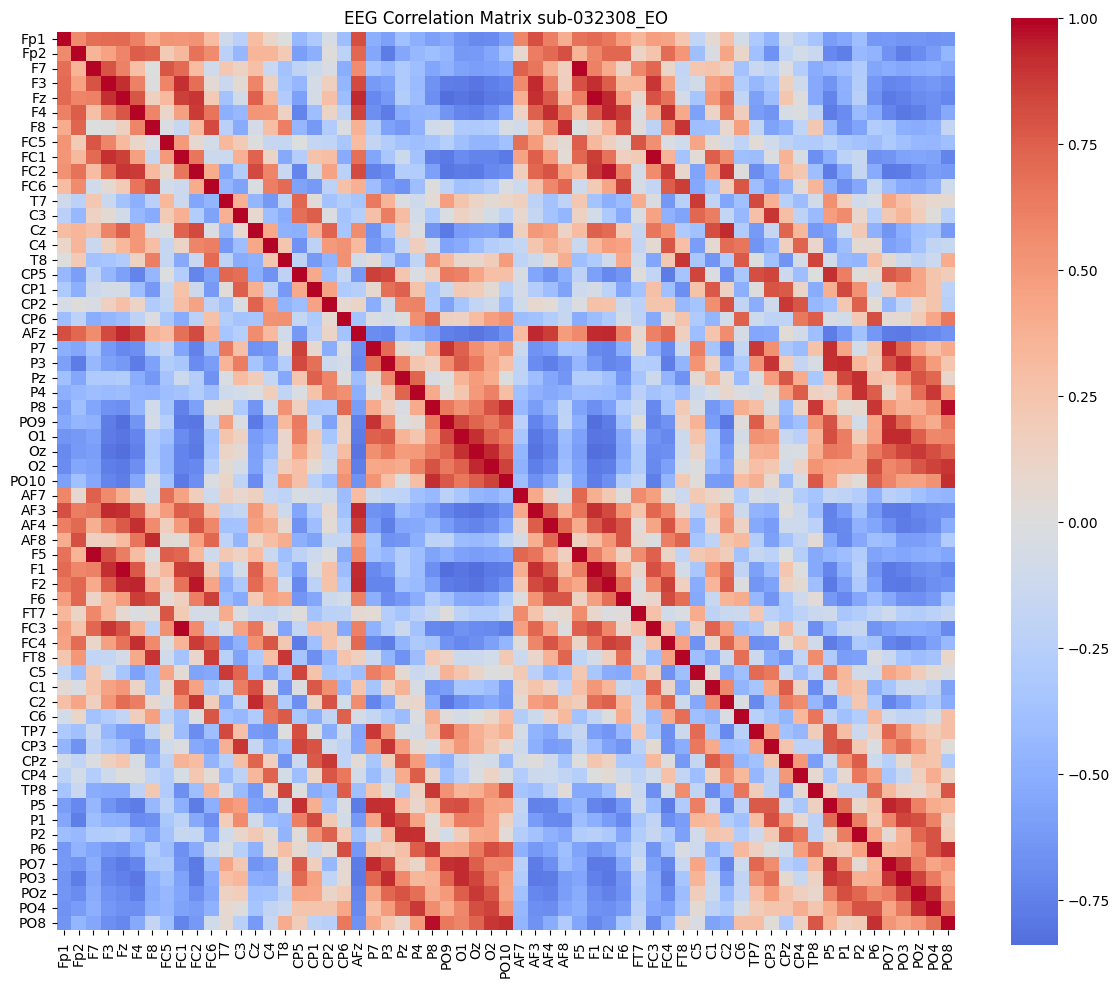

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010012_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032308_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010012_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


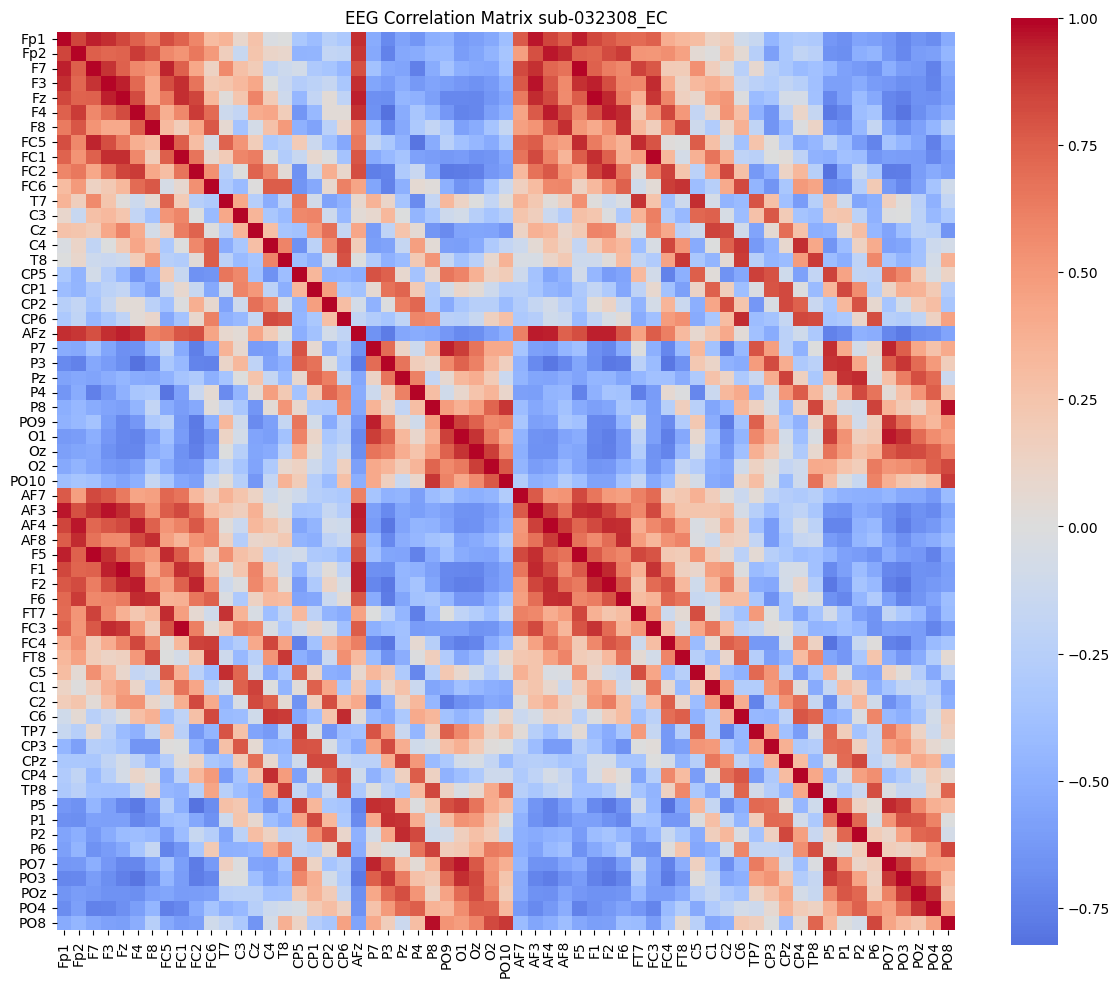

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010016_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032310_EO.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010016_EO.fdt) is incorrect, the file name must have changed on disk, using the correct f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


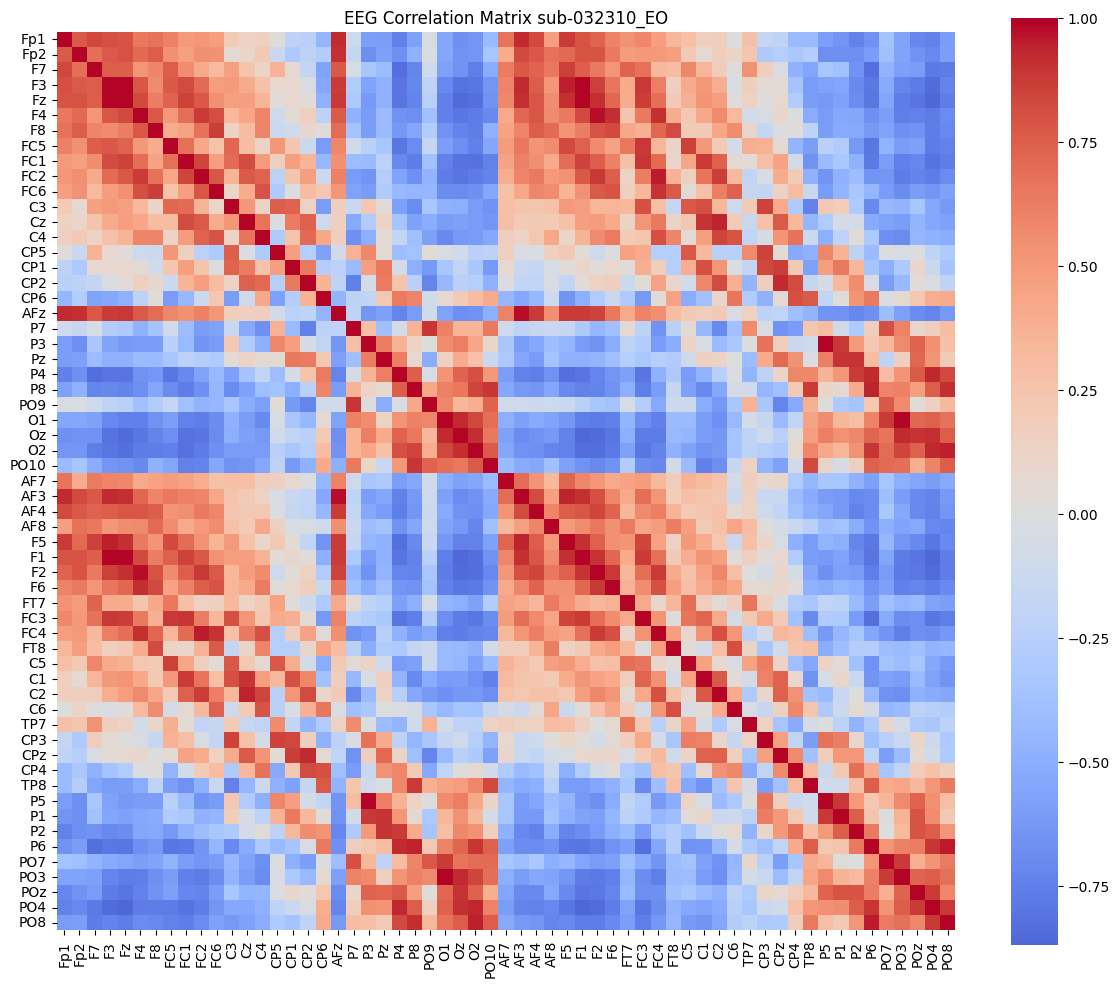

An error occurred: name 'correlation_folder' is not defined


C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Data file name in EEG.data (sub-010016_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032310_EC.fdt).
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\3299792439.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_15420\4164518460.py:27: RuntimeWarning: Data file name in EEG.data (sub-010016_EC.fdt) is incorrect, the file name must have changed on disk, using the correct f

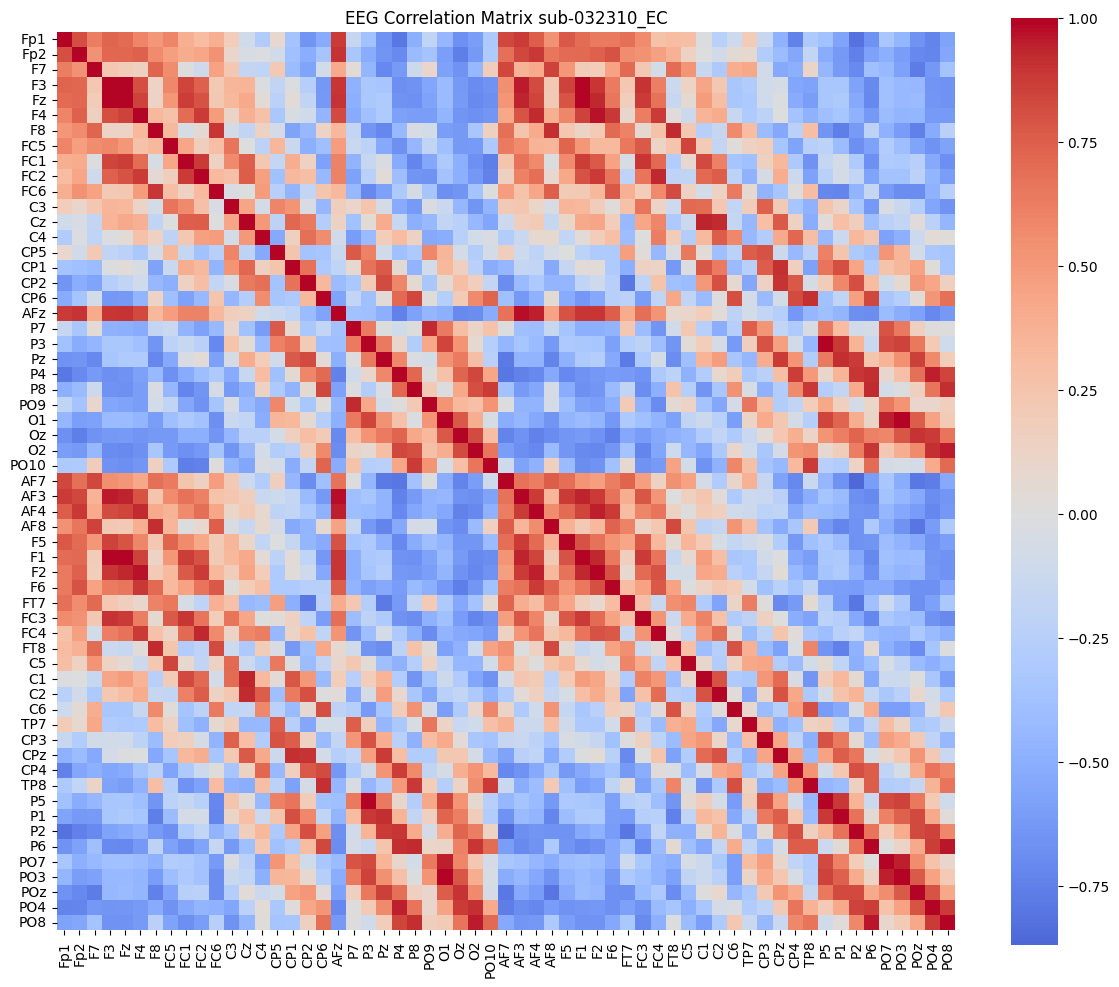

An error occurred: name 'correlation_folder' is not defined


In [ ]:
# List subjects to analyse 
# subjects = ["032304", "032305"]   # Set to all by default. Compleate "subjects_list" stored in config
# You can also analyse only one condition by changing the "conditions" parameter 
# e.g. condition = "EC"

# Initialize lists to store data and their corresponding p-valus for each condition
eo_data = []  # Will store tuples of (psd_data, freqs) for EO condition
ec_data = []  # Will store tuples of (psd_data, freqs) for EC condition

for subject in subjects:
    for condition in conditions:
        """ 
        This will load the EEG data for the subject or subjects selected and display:
        Sampling rate
        Number of channels
        Electrode positions
        """
        eeg_file_path = os.path.join(input_folder, f"{subject}_{condition}.set")
        
        if not os.path.exists(eeg_file_path):
            print(f"File not found: {eeg_file_path}")
            continue  # Skip to the next file if not found
        
        # Load EEG data
        data = mne.io.read_raw_eeglab(eeg_file_path, preload=True)    
        
        ch_names = data.ch_names
        
        # Optional filtering parameters
        filter_params = {
          'l_freq': 1,   # Low frequency
          'h_freq': 100   # High frequency
        }
    
        # Optional artifact rejection parameters
        reject_params = {
          'eeg': 150e-6,  # 150 microvolts
        }
     
        try:
          # Compute correlation matrix
          correlation_matrix, channel_names = compute_eeg_correlation_matrix(
            eeg_file_path, 
            ref_channels=['Average'],  # Example reference
            filter_params=filter_params,
            reject_params=reject_params
          )
        
          # Plot correlation matrix
          plot_correlation_matrix(correlation_matrix, channel_names, title=f'EEG Correlation Matrix {subject}_{condition}',
)
        
          # Save the current figure
          plot_filepath = os.path.join(corr_folder, f"{subject}_{condition}_corr_matrix.png")
          plt.savefig(plot_filepath, dpi=300, bbox_inches='tight')
          plt.close()  # Optional: close the figure to free up memory
        
          # Optional: Statistical significance of correlations
          def correlation_pvalues(correlation_matrix):
            """
            Compute p-values for correlations
            """
            n = correlation_matrix.shape[0]
            p_values = np.zeros_like(correlation_matrix)
            
            for i in range(n):
                for j in range(n):
                    # Fisher's z-transformation
                    r = correlation_matrix[i, j]
                    t = r * np.sqrt((n-2)/(1-r**2))
                    p_values[i, j] = 2 * (1 - stats.t.cdf(abs(t), n-2))
            
            return p_values
        
          #  Compute and print significant correlations
          p_values = correlation_pvalues(correlation_matrix)
          significant_correlations = p_values < 0.05  # Adjust threshold as needed
          print("Number of significant correlations:", 
            np.sum(significant_correlations) - correlation_matrix.shape[0])
    
          # Store data and ch_names for each condition
          if condition == 'EC':
            ec_data.append((data.copy(), ch_names))
          elif condition == 'EO':
            eo_data.append((data.copy(), ch_names))
               
          # Save as a dictionary
          corr_data = {
            'correlation_matrix': correlation_matrix,
            'p_values': p_values
          }
          corr_filepath = os.path.join(corr_folder, f"{subject}_{condition}_corr.npz")
          np.savez(corr_filepath, **corr_data)
          print(f"Data for {subject} - {condition} saved!")

        except Exception as e:
          print(f"An error occurred: {e}")

## Comparison of EC and EO correlation matrices for a single subject:

### def functions

In [ ]:
def plot_subject_condition_comparison(correlation_folder, subject):
    """
    Plot side-by-side correlation matrices for EC and EO conditions for a single subject.
    
    Parameters:
    -----------
    correlation_folder : str
        Path to the folder containing correlation files
    subject : str
        Subject ID to compare
    """
    # Load data for the subject
    ec_data = np.load(os.path.join(correlation_folder, f"{subject}_EC_corr.npz"))
    eo_data = np.load(os.path.join(correlation_folder, f"{subject}_EO_corr.npz"))
    
    # Get correlation matrices and channel names
    ec_matrix = ec_data['correlation_matrix']
    eo_matrix = eo_data['correlation_matrix']
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot EC correlation matrix
    sns.heatmap(ec_matrix, 
                ax=ax1,
                cmap='coolwarm', 
                center=0,
                square=True,
                vmin=-1, 
                vmax=1)
    ax1.set_title(f'{subject} - Eyes Closed (EC) Correlation Matrix')
    
    # Plot EO correlation matrix
    sns.heatmap(eo_matrix, 
                ax=ax2,
                cmap='coolwarm', 
                center=0,
                square=True,
                vmin=-1, 
                vmax=1)
    ax2.set_title(f'{subject} - Eyes Open (EO) Correlation Matrix')
    
    plt.tight_layout()
    plt.show()
    
def plot_condition_differences_with_stats(correlation_folder, subject=None):
    """
    Plot condition differences with statistical significance at both single-subject and group levels.
    
    Parameters:
    -----------
    correlation_folder : str
        Path to the folder containing correlation files
    subject : str, optional
        Specific subject to analyze. If None, does group-level analysis
    
    Returns:
    --------
    Visualization of correlation matrices and statistical significance
    """
    def load_condition_matrix(subject, condition):
        """Helper function to load correlation matrix"""
        filename = f"{subject}_{condition}_corr.npz"
        filepath = os.path.join(correlation_folder, filename)
        loaded_data = np.load(filepath)
        return (
            loaded_data['correlation_matrix'], 
            loaded_data.get('p_values', None)  # Load p-values if available
        )
    
    # Single Subject Analysis
    if subject:
        # Load individual subject matrices and p-values
        ec_matrix, ec_pvalues = load_condition_matrix(subject, 'EC')
        eo_matrix, eo_pvalues = load_condition_matrix(subject, 'EO')
        
        # Compute difference matrix
        diff_matrix = ec_matrix - eo_matrix
        
        # Compute statistical significance (-log10(p))
        if ec_pvalues is not None and eo_pvalues is not None:
            # Compute p-values for the difference (you might want to use a more sophisticated method)
            combined_pvalues = np.minimum(ec_pvalues, eo_pvalues)
            significance = -np.log10(combined_pvalues)
            significance[np.isinf(significance)] = significance[~np.isinf(significance)].max()
        else:
            significance = None
        
        # Create figure
        if significance is not None:
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(32, 8))
        else:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
        
        # Plot EC matrix
        sns.heatmap(ec_matrix, 
                    ax=ax1,
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    vmin=-1, 
                    vmax=1,
                    cbar_kws={'label': 'Correlation'})
        ax1.set_title(f'{subject} - Eyes Closed (EC)')
        
        # Plot EO matrix
        sns.heatmap(eo_matrix, 
                    ax=ax2,
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    vmin=-1, 
                    vmax=1,
                    cbar_kws={'label': 'Correlation'})
        ax2.set_title(f'{subject} - Eyes Open (EO)')
        
        # Plot Difference matrix
        diff_heatmap = sns.heatmap(diff_matrix, 
                    ax=ax3,
                    cmap='RdBu_r', 
                    center=0,
                    square=True,
                    cbar_kws={'label': 'Correlation Difference (EC - EO)'})
        ax3.set_title(f'{subject} - Difference (EC - EO)')
        
        # Plot Statistical Significance
        if significance is not None:
            sns.heatmap(significance, 
                        ax=ax4,
                        cmap='plasma', 
                        square=True,
                        cbar_kws={'label': '-log10(p-value)'})
            ax4.set_title(f'{subject} - Statistical Significance')
        
        plt.tight_layout()
        plt.show()
    
    # Group-Level Analysis
    else:
        # Find all subjects
        subjects = [f.split('_')[0] for f in os.listdir(correlation_folder) if f.endswith('_EC_corr.npz')]
        
        # Collect matrices for all subjects
        ec_matrices = []
        eo_matrices = []
        ec_pvalues_list = []
        eo_pvalues_list = []
        
        # Track matrix dimensions
        matrix_shapes = []
        
        for sub in subjects:
            try:
                ec_mat, ec_pvals = load_condition_matrix(sub, 'EC')
                eo_mat, eo_pvals = load_condition_matrix(sub, 'EO')
                
                matrix_shapes.append(ec_mat.shape)
                
                ec_matrices.append(ec_mat)
                eo_matrices.append(eo_mat)
                
                if ec_pvals is not None:
                    ec_pvalues_list.append(ec_pvals)
                if eo_pvals is not None:
                    eo_pvalues_list.append(eo_pvals)
            
            except Exception as e:
                print(f"Error processing subject {sub}: {e}")
        
        # Align matrices if needed (same as previous implementation)
        if len(set(matrix_shapes)) > 1:
            from collections import Counter
            most_common_shape = Counter(matrix_shapes).most_common(1)[0][0]
            
            def align_matrix(matrix, target_shape):
                if matrix.shape == target_shape:
                    return matrix
                
                min_rows = min(matrix.shape[0], target_shape[0])
                min_cols = min(matrix.shape[1], target_shape[1])
                
                aligned = np.zeros(target_shape)
                aligned[:min_rows, :min_cols] = matrix[:min_rows, :min_cols]
                return aligned
            
            ec_matrices = [align_matrix(mat, most_common_shape) for mat in ec_matrices]
            eo_matrices = [align_matrix(mat, most_common_shape) for mat in eo_matrices]
        
        # Compute group-level averages
        ec_avg = np.mean(ec_matrices, axis=0)
        eo_avg = np.mean(eo_matrices, axis=0)
        diff_avg = ec_avg - eo_avg
        
        # Compute group-level statistical significance
        if ec_pvalues_list and eo_pvalues_list:
            # Align p-value matrices if needed
            if len(set(p.shape for p in ec_pvalues_list)) > 1:
                most_common_shape = Counter(p.shape for p in ec_pvalues_list).most_common(1)[0][0]
                ec_pvalues_list = [align_matrix(p, most_common_shape) for p in ec_pvalues_list]
                eo_pvalues_list = [align_matrix(p, most_common_shape) for p in eo_pvalues_list]
            
            # Compute average p-values (you might want to use a more sophisticated method)
            avg_ec_pvalues = np.mean(ec_pvalues_list, axis=0)
            avg_eo_pvalues = np.mean(eo_pvalues_list, axis=0)
            combined_pvalues = np.minimum(avg_ec_pvalues, avg_eo_pvalues)
            
            # Convert to -log10(p)
            significance = -np.log10(combined_pvalues)
            significance[np.isinf(significance)] = significance[~np.isinf(significance)].max()
        else:
            significance = None
        
        # Create figure
        if significance is not None:
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(32, 8))
        else:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
        
        # Plot EC average matrix
        sns.heatmap(ec_avg, 
                    ax=ax1,
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    vmin=-1, 
                    vmax=1,
                    cbar_kws={'label': 'Average Correlation'})
        ax1.set_title('Group Average - Eyes Closed (EC)')
        
        # Plot EO average matrix
        sns.heatmap(eo_avg, 
                    ax=ax2,
                    cmap='coolwarm', 
                    center=0,
                    square=True,
                    vmin=-1, 
                    vmax=1,
                    cbar_kws={'label': 'Average Correlation'})
        ax2.set_title('Group Average - Eyes Open (EO)')
        
        # Plot Difference average matrix
        diff_heatmap = sns.heatmap(diff_avg, 
                    ax=ax3,
                    cmap='RdBu_r', 
                    center=0,
                    square=True,
                    cbar_kws={'label': 'Average Correlation Difference (EC - EO)'})
        ax3.set_title('Group Average - Difference (EC - EO)')
        
        # Plot Statistical Significance
        if significance is not None:
            sns.heatmap(significance, 
                        ax=ax4,
                        cmap='plasma', 
                        square=True,
                        cbar_kws={'label': '-log10(p-value)'})
            ax4.set_title('Group Average - Statistical Significance')
        
        plt.tight_layout()
        plt.show()
        
        return ec_avg, eo_avg, diff_avg, significance

### Plot Subject comparison

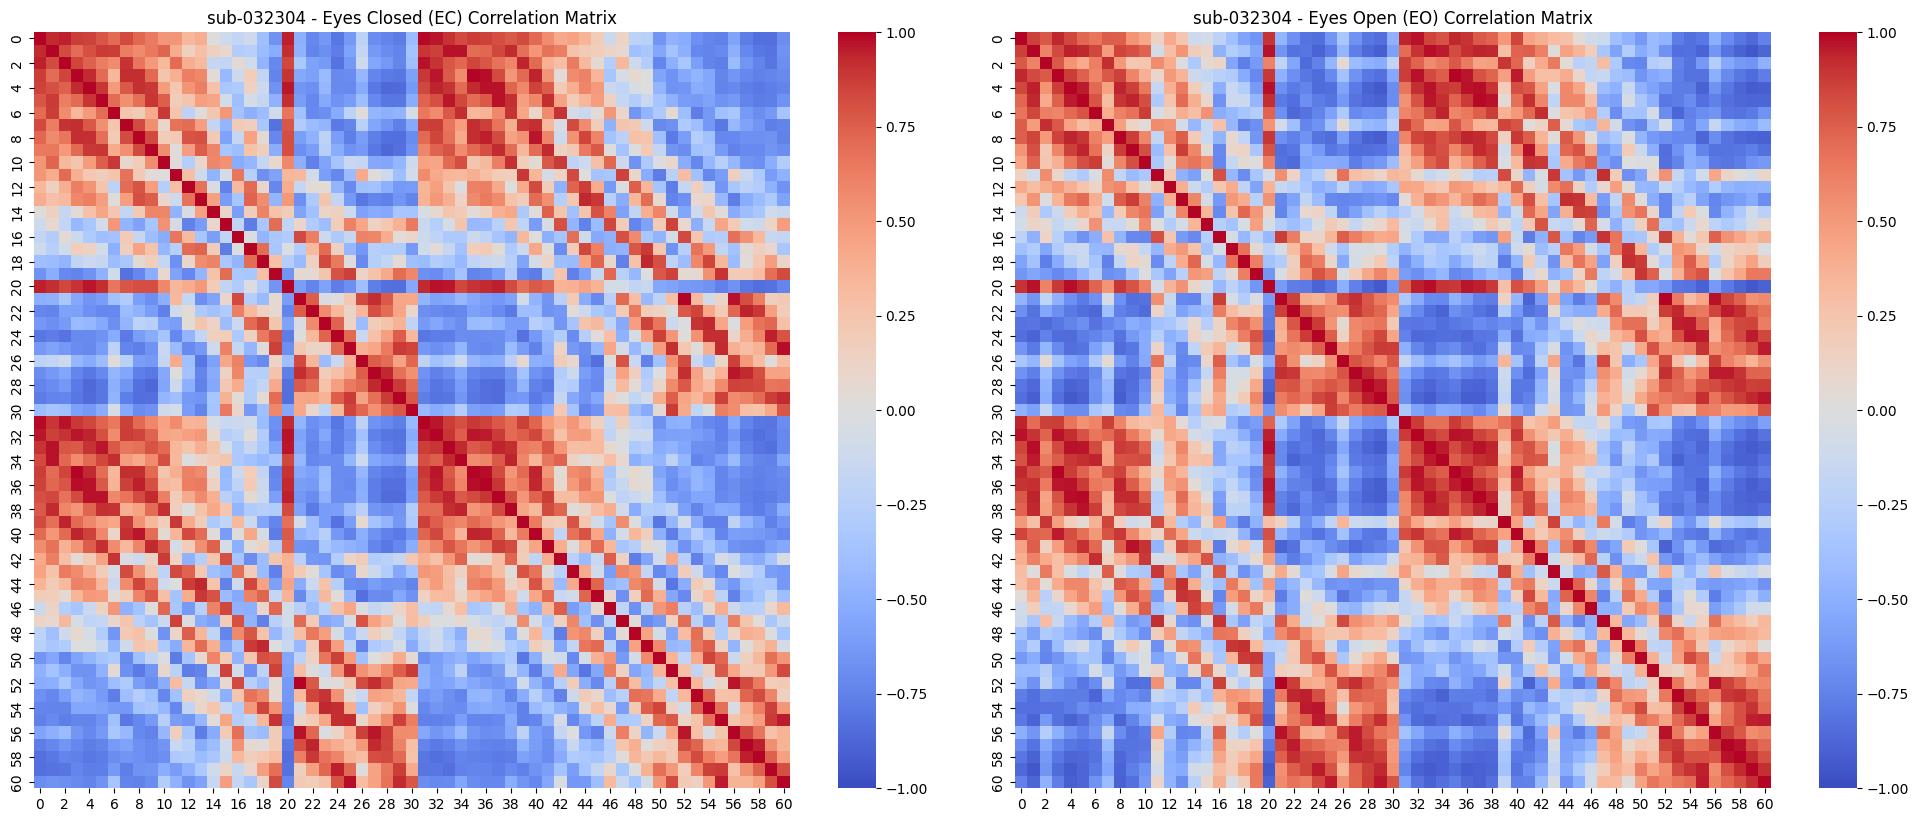

In [ ]:
plot_subject_condition_comparison(correlation_folder, 'sub-032304')


### Plot subject with stats

C:\Users\Marianne\AppData\Local\Temp\ipykernel_8640\862509222.py:84: RuntimeWarning: divide by zero encountered in log10
  significance = -np.log10(combined_pvalues)


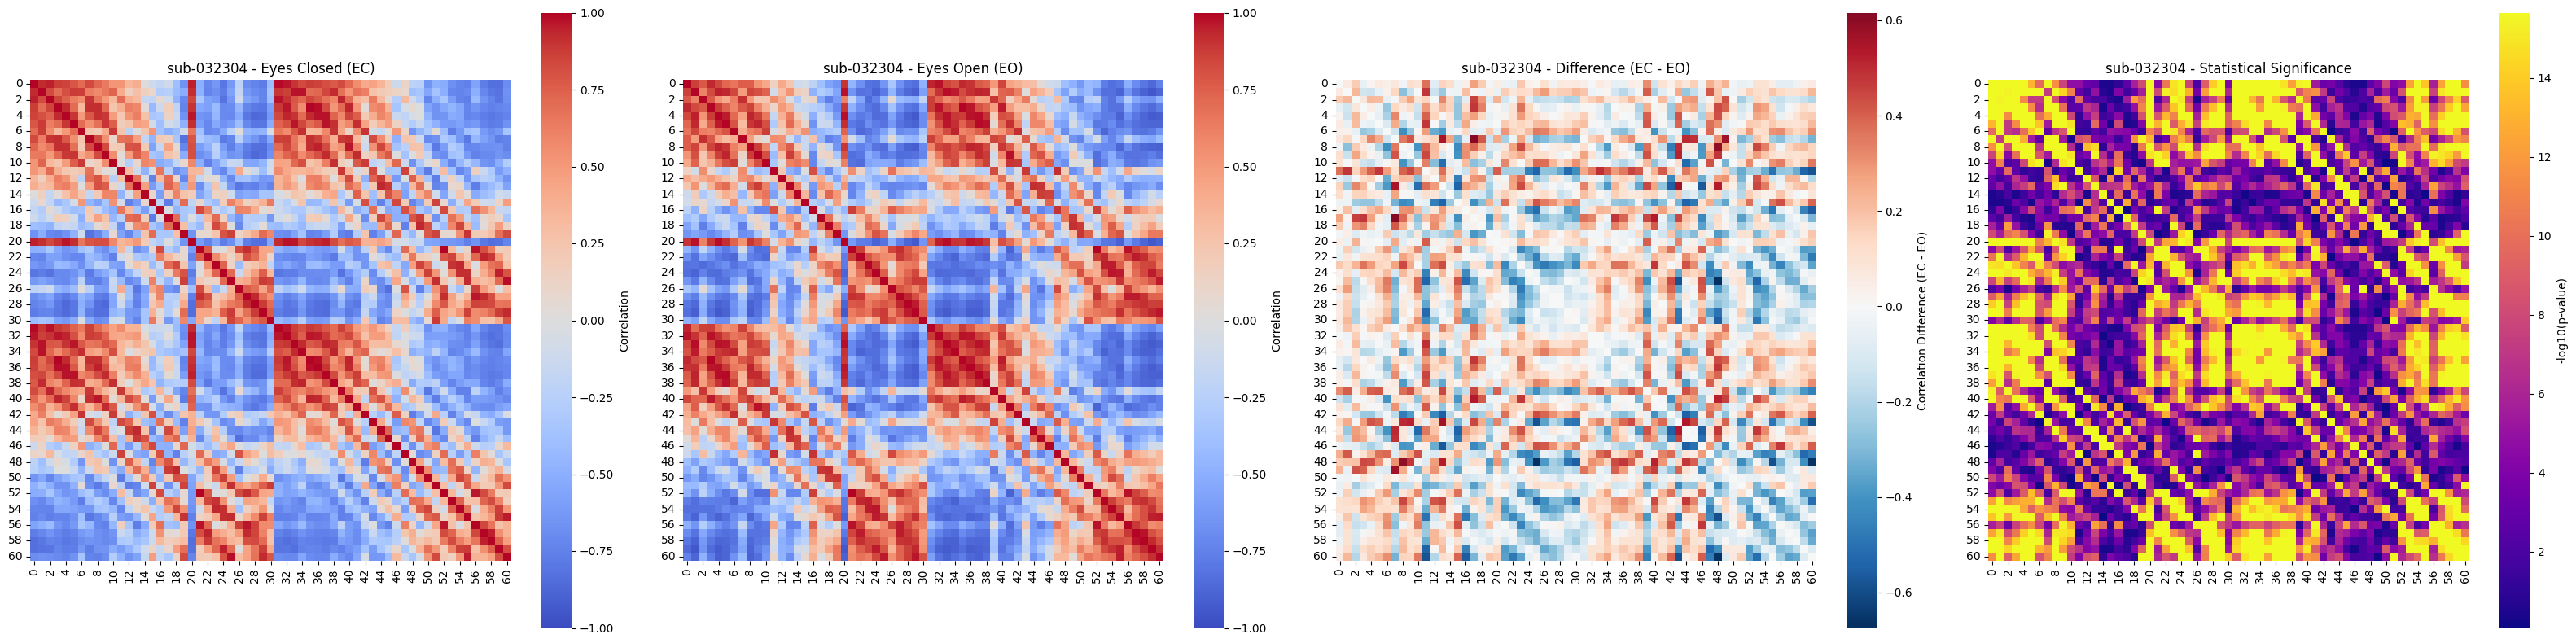

In [ ]:
plot_condition_differences_with_stats(corr_folder, subject='sub-032304')

## Group-level average connectivity matrices by condition:

### def functions

In [ ]:
def align_and_average_connectivity_matrices(correlation_folder, condition):
    """
    Align and average connectivity matrices across subjects.
    
    Parameters:
    -----------
    correlation_folder : str
        Path to the folder containing correlation files
    condition : str
        Condition to analyze (e.g., 'EC' or 'EO')
    
    Returns:
    --------
    tuple: (average_matrix, std_matrix, common_channels)
    """
    # Find all correlation files for the specified condition
    correlation_files = [f for f in os.listdir(correlation_folder) 
                         if f.endswith(f'_{condition}_corr.npz')]
    
    # Check if any files were found
    if not correlation_files:
        print(f"No correlation files found for condition: {condition}")
        return None, None, None
    
    # Load matrices and track channel names
    matrices = []
    all_channel_sets = []
    
    for filename in correlation_files:
        try:
            file_path = os.path.join(correlation_folder, filename)
            data = np.load(file_path)
            
            # Try to get correlation matrix
            correlation_matrix = data['correlation_matrix']
            matrices.append(correlation_matrix)
            
            # Try to get channel names (adjust based on how you saved them)
            channel_names = data.get('channel_names', None)
            if channel_names is not None:
                all_channel_sets.append(set(channel_names))
            else:
                # If no channel names, use matrix indices
                all_channel_sets.append(set(range(correlation_matrix.shape[0])))
        
        except Exception as e:
            print(f"Error loading file {filename}: {e}")
            continue
    
    # Check if any matrices were successfully loaded
    if not matrices:
        print("No valid correlation matrices found.")
        return None, None, None
    
    # Find common channels across all subjects
    common_channels = set.intersection(*all_channel_sets) if all_channel_sets else None
    
    # Align matrices
    aligned_matrices = []
    for matrix, channel_set in zip(matrices, all_channel_sets):
        if common_channels is not None:
            # Create a mask for common channels
            if isinstance(list(common_channels)[0], str):
                mask = [list(channel_set).index(ch) for ch in common_channels]
            else:
                mask = list(common_channels)
            
            aligned_matrix = matrix[np.ix_(mask, mask)]
        else:
            # If no common channels, use full matrices
            aligned_matrix = matrix
        
        aligned_matrices.append(aligned_matrix)
    
    # Compute average and standard deviation
    average_matrix = np.mean(aligned_matrices, axis=0)
    std_matrix = np.std(aligned_matrices, axis=0)
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot average connectivity matrix
    sns.heatmap(average_matrix, 
                ax=ax1,
                cmap='coolwarm', 
                center=0,
                square=True,
                vmin=-1, 
                vmax=1)
    ax1.set_title(f'Group Average - {condition} Correlation Matrix')
    
    # Plot standard deviation of connectivity matrix
    sns.heatmap(std_matrix, 
                ax=ax2,
                cmap='viridis', 
                square=True)
    ax2.set_title(f'Group Std Dev - {condition} Correlation Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return average_matrix, std_matrix, list(common_channels) if common_channels else None



### Plot group avg by condition and std

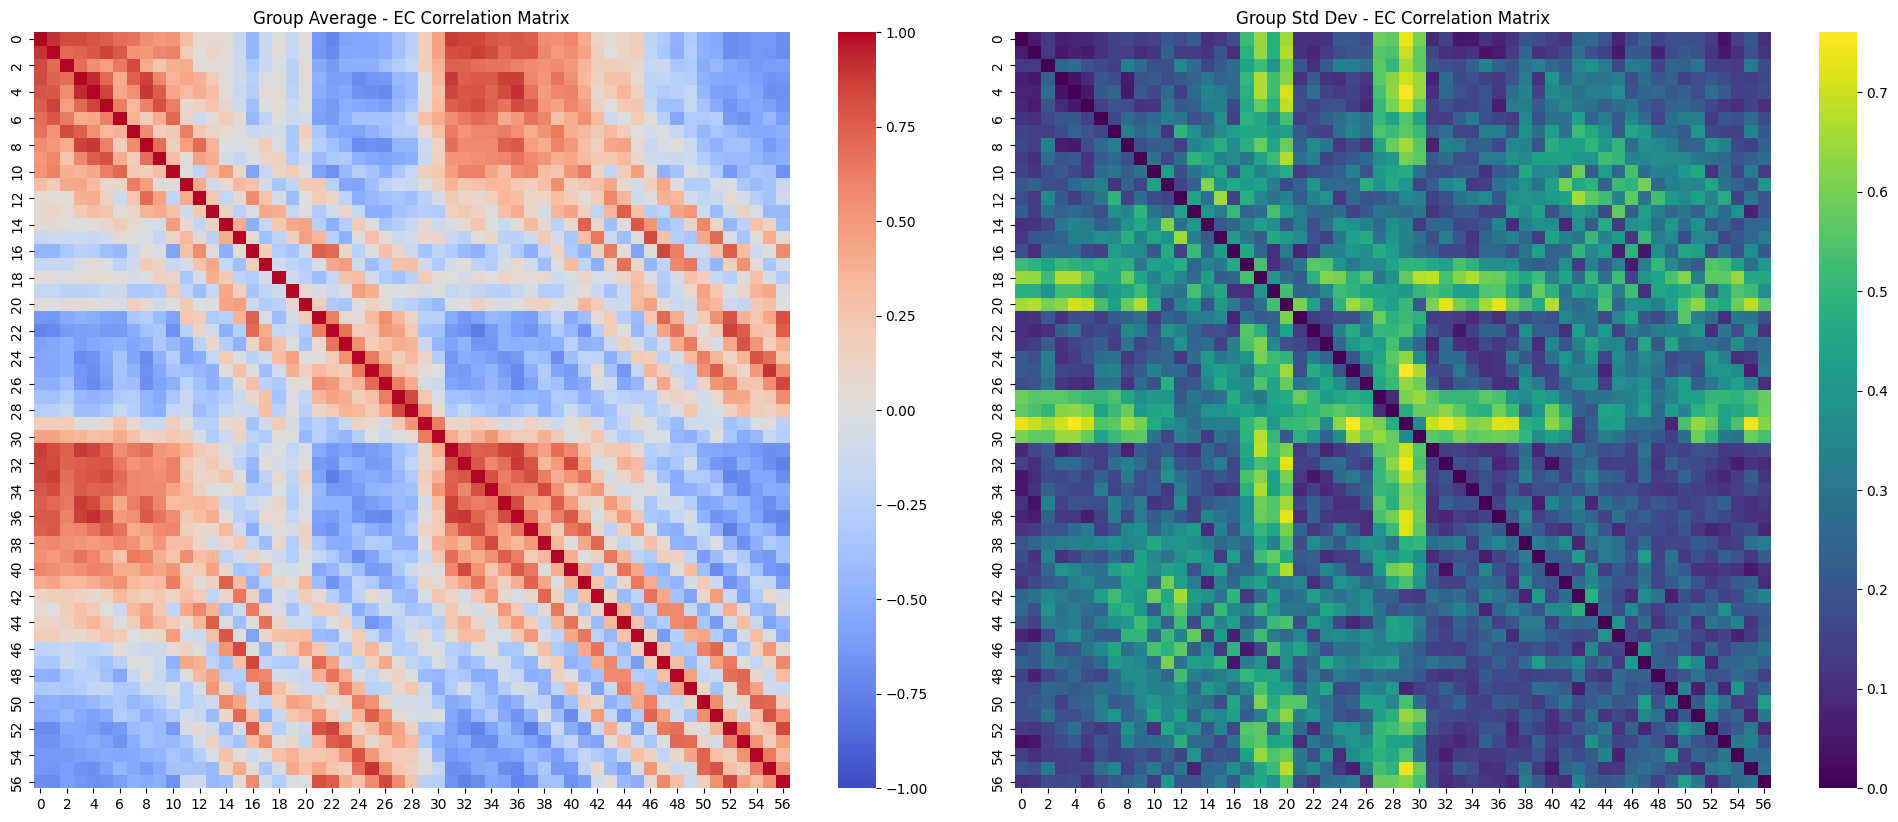

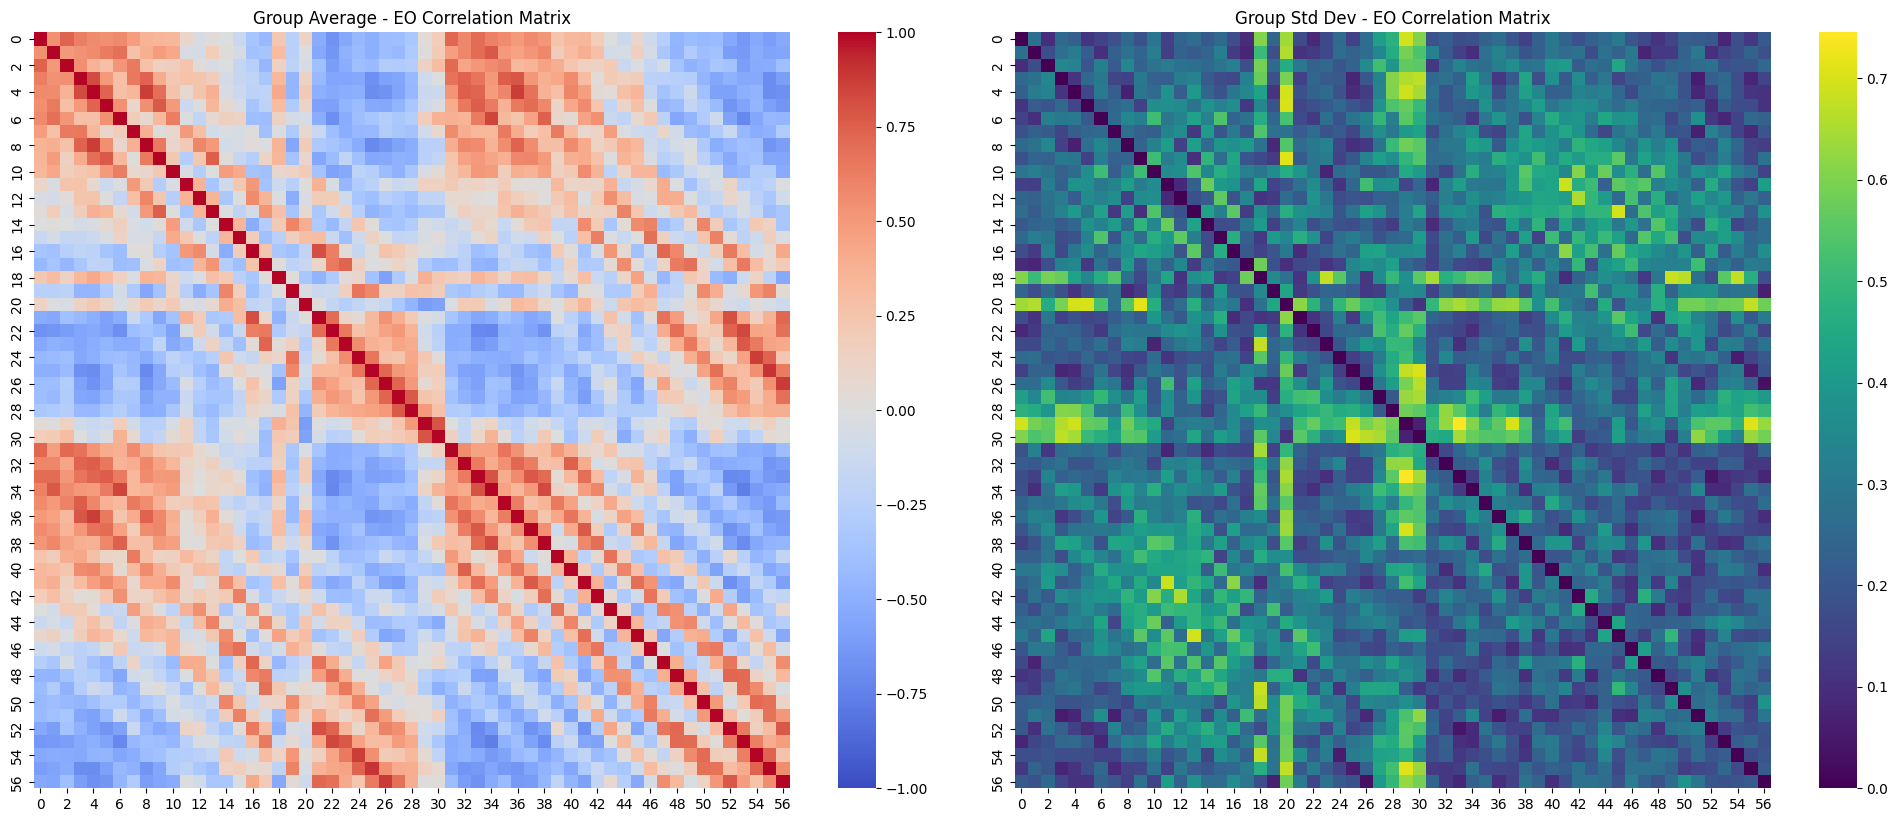

In [ ]:
# Usage
try:
    average_ec_matrix, std_ec_matrix, common_channels = align_and_average_connectivity_matrices(corr_folder, 'EC')
    if average_ec_matrix is not None:
        average_eo_matrix, std_eo_matrix, _ = align_and_average_connectivity_matrices(corr_folder, 'EO')
except Exception as e:
    print(f"An error occurred: {e}")

### Group avg with stats

C:\Users\Marianne\AppData\Local\Temp\ipykernel_8640\862509222.py:208: RuntimeWarning: divide by zero encountered in log10
  significance = -np.log10(combined_pvalues)


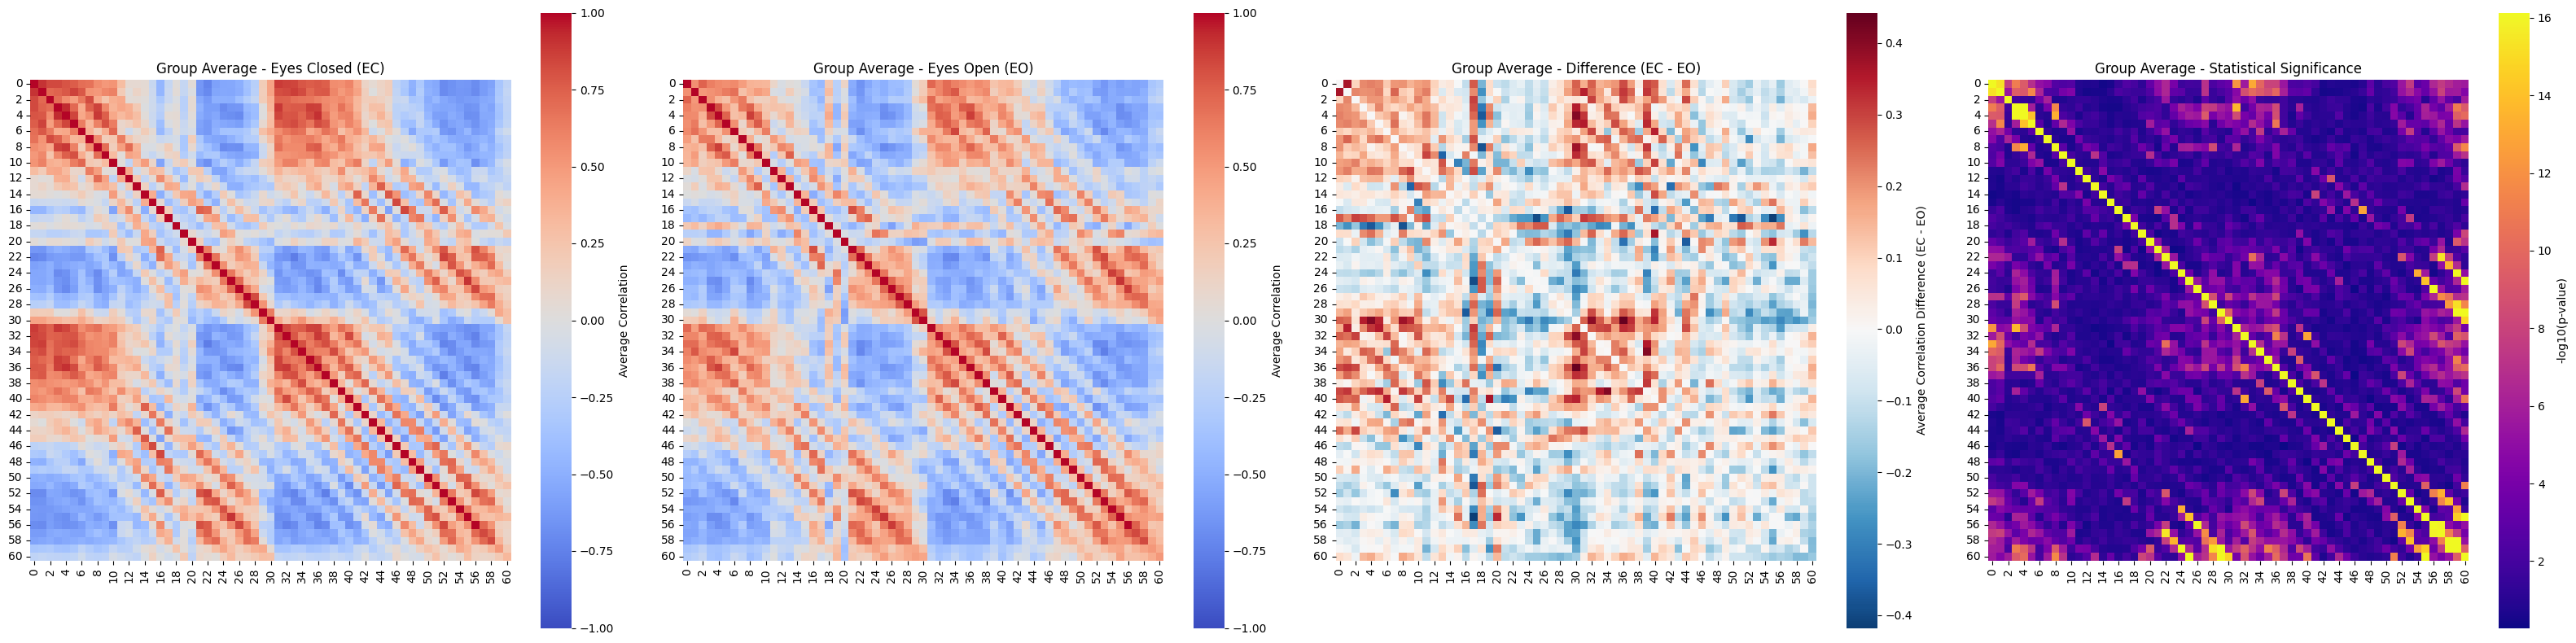

In [ ]:
results = plot_condition_differences_with_stats(corr_folder)